# Optimisasi Fungsi-fungsi Satu Variabel

Optimisasi selalu berhubungan dengan pencarian titik dan nilai maksimum atau minimum dari suatu fungsi matematika.
Ada dua jenis dari titik maksimum/minimum, yaitu:
- global,
- lokal.

Titik maksimum/minimum **global** berarti titik tersebut merupakan titik paling maksimum dan/atau minimum dari semua titik yang ada (bisa dibilang, titik-titik tersebut selalu maksimum/minimum di dalam interval $\displaystyle (-\infty, \infty)$ ).

Sedangkan untuk titik maksimum/minimum **lokal** berarti titik tersebut merupakan titik maksimum dan/atau minimum di dalam sebuah interval $[x_1, x_2]$.

Berikut ilustrasi dari titik maksimum dan minimum global maupun lokal dari suatu fungsi:

<a href="https://imgur.com/mnkvO7I"><img src="https://i.imgur.com/mnkvO7I.png" title="source: imgur.com" /></a>
<center> *Sumber: Numerical Methods for Engineers 6th Edition, 2010* </center>

Di dalam metode numerik terdapat beberapa metode untuk mencari titik dan nilai maksimum/minimum dari suatu fungsi, yaitu:

1. golden-section search
2. parabolic interpolation
3. newton's method

*Perlu diperhatikan, metode-metode di atas memiliki tujuan untuk mencari nilai maksimum/minimum **lokal** *

## 1. Golden-Section Search

Pada dasarnya, **Golden-Section Search** adalah metode untuk mencari nilai maksimum/minimum dari suatu fungsi.

Singkatnya, tujuan dari metode ini adalah untuk menemukan $x$ yang memenuhi:
$$
    \min_{x} \, f(x)
$$
di mana $f$ adalah fungsi sembarang dan $x$ adalah domain dari fungsi $f$.

Hal yang diperlukan agar algoritma ini berjalan antara lain:

- data$\quad \quad \quad \quad \quad \quad \,\,\,$:  $f(x)$,
- titik atas dan titik bawah: $x_L$ dan $x_U$; di mana $x_L$ dan $x_U$ dapat ditentukan secara bebas dan harus berbeda,
- R (Golden Ratio)$\quad \quad$: $\displaystyle \frac{\sqrt{5}-1}{2}$.

*Catatan:* $x_U$ adalah titik atas dan $x_L$ adalah titik bawah.

Kemudian, setelah menentukan $x_U$ dan $x_L$ langkah selanjutnya adalah mencari $d$.

$d$ ini diperoleh dari:

$$d = R \, (x_U-x_L)$$

Setelah itu, barulah kita mencari $x_1$ dan $x_2$,
di mana:
\begin{align*}
   x_1 &= x_L + d
   \\
   x_2 &= x_U - d
\end{align*}

Ketika $x_1$ dan $x_2$ ditemukan, maka diperoleh $f(x_1)$ dan $f(x_2)$.

Berdasarkan $f(x_1)$ dan $f(x_2)$, maka akan dua kondisi yang terjadi, yaitu:

1. $f(x_1) < f(x_2)$
2. $f(x_1) > f(x_2)$

Untuk kasus $f(x_1) < f(x_2)$, maka:

\begin{align*}
    x_L &\Leftarrow x_2
    \\
    x_2 &\Leftarrow x_1
    \\
    d &= R \, (x_U-x_L)
    \\
    x_1 &= x_L + d
\end{align*}

Sedangkan untuk kasus $f(x_1) > f(x_2)$, maka:

\begin{align*}
    x_U &\Leftarrow x_1
    \\
    x_1 &\Leftarrow x_2
    \\
    d &= R \, (x_U-x_L)
    \\
    x_2 &= x_U - d
\end{align*}

Proses membandingkan $f(x_1)$ dan $f(x_2)$ akan berjalan terus hingga selisih $x_2$ dengan $x_1$ sangat kecil, maksudnya adalah $|x_2 - x_1|$ sekecil mungkin. Untuk itu, maka dipilihlah selisih $|x_2 - x_1| = 10^{-6}$.

*Catatan:* Pemilihan selisih ini ditentukan secara bebas dan sesuai kesepakatan saja, yang penting selisihnya sangat kecil.

Sebagai contoh,

Diketahui $\displaystyle \, \,f(x) = x^3$. Tentukan nilai minimum $f(x)$ di dalam interval $[0,4]$.

Jawaban:

Pertama, kita deklarasikan $x_L$, $x_U$, dan $r$ terlebih dahulu.

In [1]:
xlow = 0
xup = 4
r = (5**(0.5)-1)/2

Untuk memudahkan perhitungan, kita buat $f(x)$ ke dalam fungsi python

In [2]:
import numpy as np

f = lambda x: x**3

Kemudian, kita hitung $d$ berdasarkan rumus di atas

In [3]:
d = r * (xup-xlow)

Lalu, kita cari $x_1$ dan $x_2$

In [4]:
x1 = xlow + d
x2 = xup - d

Setelah itu, kita cari $f(x_1)$ dan $f(x_2)$

In [5]:
f1 = f(x1)
f2 = f(x2)

Lalu, kita bandingkan `f1` dengan `f2`

In [6]:
sel = x2-x1
sel = np.fabs(sel)

while(sel >= 0.000001):
    if f1 < f2:
        xlow = x2
        x2 = x1
        d = r * (xup-xlow)
        x1 = xlow + d
    elif f1 > f2:
        xup = x1
        x1 = x2
        d = r * (xup-xlow)
        x2 = xup - d
    sel = x2-x1
    sel = np.fabs(sel)
print("x2 = %f\nf(x2) = %f" % (x2, f(x2)))

x2 = 0.000001
f(x2) = 0.000000


Agar intuisi dari algoritma di atas dapat terbangun, berikut adalah yang terjadi di setiap iterasinya dengan menggunakan contoh di atas ($f(x) = x^3$, $x_L = 0$, $x_U = 4$):

Pertama-tama, kita visualisasikan $f(x)$ dan kedua titik awalnya $x_L$ dan $x_U$ terlebih dahulu:

In [7]:
import matplotlib.pyplot as plt
import numpy as np


y = lambda x: x**3                 #f(x) = x**3
x = np.arange(0,10)

xlow, xup = 0, 4

def gambar():
    plt.plot(x,y(x))
    plt.plot([xlow,xup],[y(xlow),y(xup)],'ro', color='blue')
    plt.text(xlow+0.05, y(xlow), '$x_L$')
    plt.text(xup+0.05, y(xup), '$x_U$')

    plt.axis([-0.5,5,-5,100])

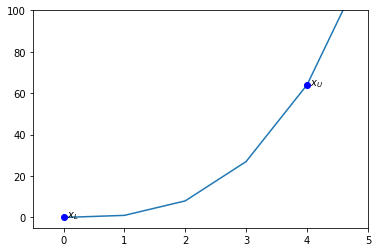

In [8]:
gambar()
plt.show()

**Iterasi Pencarian Titik Minimum**

Kita akan menentukan $x_1$ dan $x_2$ terlebih dahulu:

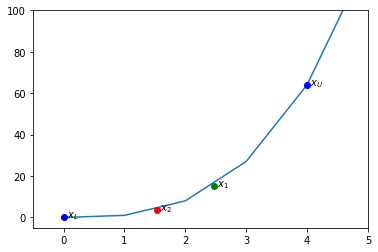

In [9]:
r = (5**(0.5)-1)/2
d = r * (xup-xlow)

x1 = xlow + d
x2 = xup - d

plt.plot(x,y(x))
plt.plot([xlow,xup],[y(xlow),y(xup)],'ro', color='blue')
plt.plot([x1],[y(x1)],'ro', color = 'green')
plt.plot([x2],[y(x2)],'ro', color = 'red')

plt.text(xlow+0.05, y(xlow), '$x_L$')
plt.text(xup+0.05, y(xup), '$x_U$')
plt.text(x1+0.05, y(x1), '$x_1$')
plt.text(x2+0.05, y(x2), '$x_2$')

plt.axis([-0.5,5,-5,100])

plt.show()

Lalu, kita akan bandingkan $f(x_1)$ dan $f(x_2)$.

Pada kasus ini, $f(x_1)>f(x_2)$.

Sehingga, yang terjadi adalah:

**)Untuk memperjelas proses kerja dari Golden-Section Search, code di bawah dapat dijalankan berulang-ulang*

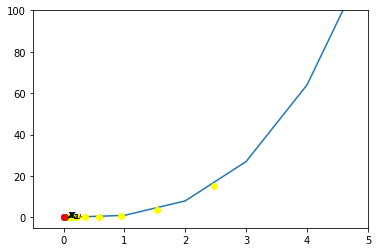

In [10]:
xu = np.array([])
xl = np.array([])

for i in range(0,10):
    #if f1 < f2
    if y(x1) < y(x2):
        xlow = x2
        x2 = x1
        d = r * (xup-xlow)
        x1 = xlow + d
    #elif f1 > f2:
    elif y(x1) > y(x2):
        xup = x1
        x1 = x2
        d = r * (xup-xlow)
        x2 = xup - d
    xu = np.append(xu,[xup])
    xl = np.append(xl,[xl])

def grafik(xlow,xup,x1,x2):
    plt.plot(x,y(x))
    plt.plot([xlow,xup],[y(xlow),y(xup)],'ro', color='blue')
    plt.plot(xu,y(xu),'ro', color = 'yellow')
    plt.plot(xl,y(xl),'ro', color = 'yellow')
    plt.plot([x1],[y(x1)],'ro', color = 'green')
    plt.plot([x2],[y(x2)],'ro', color = 'red')

    plt.text(xlow+0.05, y(xlow), '$x_L$')
    plt.text(xup+0.05, y(xup), '$x_U$')
    plt.text(x1+0.05, y(x1), '$x_1$')
    plt.text(x2+0.05, y(x2), '$x_2$')
    
    plt.axis([-0.5,5,-5,100])
    
grafik(xlow,xup,x1,x2)
plt.show()

Dengan melakukan 10 kali iterasi, dapat terlihat bahwa titik minimum dari $f(x) = x^3$ berada pada $(0,0)$.

Kita dapat melihat bahwa semua titik yang ada, bergerak menuju satu titik, dalam hal ini $x=0$.

Nilai minimum dari $f(x)$ bisa diperoleh dari $f(x_1)$ ataupun $f(x_2)$. Hal ini terjadi karena jarak antara $x_1$ dengan $x_2$ itu dibuat sekecil mungkin. Sehingga, kita dapat mengambil salah satu dari antara dua titik tersebut karena kedua titik tersebut menuju ke satu titik dan jarak mereka sangat dekat.

Maka, algoritma secara lengkap dari Golden-Section Search dengan contoh $f(x) = x^{3}$ adalah sebagai berikut:

In [11]:
import numpy as np

#definisikan terlebih dahulu f(x) dari masalah yang ada dan ditentukan xlow = 0 dan xup = 4
f = lambda x : x**3

xlow, xup = 0, 4

def Golden(f, xlow, xup):
    r = (5**(0.5)-1)/2
    d = r * (xup-xlow)
    
    x1 = xlow + d
    x2 = xup - d
    
    f1 = f(x1)
    f2 = f(x2)
    
    sel = x2-x1
    sel = np.fabs(sel)

    while(sel >= 0.000001):
        if f1 < f2:
            xlow = x2
            x2 = x1
            d = r * (xup-xlow)
            x1 = xlow + d
        elif f1 > f2:
            xup = x1
            x1 = x2
            d = r * (xup-xlow)
            x2 = xup - d
        sel = x2-x1
        sel = np.fabs(sel)
    return x2

xmin = Golden(f, xlow, xup)
fmin = f(xmin)

print("Titik minimum: %f\nNilai minimum: %f" % (xmin, fmin))

Titik minimum: 0.000001
Nilai minimum: 0.000000


## 2. Parabolic Interpolation

Metode ini mengambil keuntungan dari karakteristik polinomial berderajat 2 yang unik. Karakteristik tersebut adalah bahwa polinomial berderajat 2 dapat dengan baik mengaproksimasi bentuk dari $f(x)$ yang mendekati titik optimumnya (dalam kasus ini, mencapai titik optimum dari fungsi kuadrat yang dibentuk. Jadi, bisa menuju titik maksimum ataupun minimum lokal).

Pada metode ini, titik awal yang ditentukan secara sembarang ada tiga titik.

Ketiga titik tersebut kita namakan sebagai $x_0, x_1, x_2$. **)Perlu diperhatikan bahwa ketiga titik tersebut tidak boleh berada dalam satu garis lurus.*

Dari ketiga titik tersebut, akan membentuk sebuah fungsi kuadrat.
Kita tahu bahwa bentuk umum dari fungsi kuadrat adalah

$$ax^2+bx+c$$

Alasan mengapa kita harus menggunakan tiga titik awal adalah untuk membentuk fungsi kuadrat (polinomial berderajat 2) dibutuhkan paling sedikit tiga titik.

Perlu kita tahu, polinomial berderajat dua (fungsi kuadrat) selalu mempunyai titik puncak. Jadi, maksud dari metode ini adalah kita membuat fungsi kuadrat dari titik-titik yang ada sehingga fungsi kuadrat tersebut membentuk bentuk yang mirip dengan $f(x)$ yang akan dicari. Sehingga, titik yang ditemukan akan selalu menuju ke titik puncak dari fungsi kuadrat tersebut.

Jadi, jika $a<0$, maka metode ini akan menghasilkan titik maksimum. <br>
Sedangkan untuk $a>0$, maka titik yang ditemukan adalah titik minimum.

*Catatan:* alasan titik-titik tidak boleh berada di dalam satu garis lurus karena fungsi parabolanya akan ter-*degenerate* sehingga tidak dapat dicari titik optimumnya.

Lalu, kita tentukan titik keempat ($x_3$). Titik ini adalah titik puncak fungsi kuadrat perkiraan yang telah kita bentuk (fungsi kuadrat dari titik $x_0, x_1, x_2$)

Di mana $x_3$ diperoleh dari:

$$ \displaystyle
    x_3 =\frac{f(x_0) \cdot (x_1^2-x_2^2) + f(x_1) \cdot (x_2^2-x_0^2) + f(x_2) \cdot (x_0^2-x_1^2)}{2 \cdot f(x_0) \cdot (x_1-x_2) + 2 \cdot f(x_1) \cdot (x_2-x_0) + 2 \cdot f(x_2) \cdot (x_0-x_1)}
.$$

Kemudian, dari 4 titik yang ada kita lakukan pencarian titik optimum dari fungsi yang telah diberikan. Kita menggunakan strategi yang mirip dengan pencarian di dalam metode **Golden-Section Search**.

Seperti pada contoh sebelumnya, kita akan menemukan nilai minimum dari $f(x) = x^3$ di mana tiga titik awalnya adalah $x_0 = 0$, $x_1 = 1$, dan $x_2 = 4$.

Kita tentukan terlebih dahulu $x_3$ dengan menggunakan rumus di atas:

In [12]:
import numpy as np

#f(x) = x^3
f = lambda x: x**3

x0, x1, x2 = 0,1,4

def xpuncak(x0,x1,x2):
    f0 = f(x0)
    f1 = f(x1)
    f2 = f(x2)
    x3 = f0*(x1**2-x2**2) + f1*(x2**2-x0**2) + f2*(x0**2-x1**2)
    return x3/(2*f0*(x1-x2) + 2*f1*(x2-x0) + 2*f2*(x0-x1))
    
x3 = xpuncak(x0,x1,x2)

print("Titik puncak yang diperoleh: %f" % (x3))

Titik puncak yang diperoleh: 0.400000


Lalu, kita akan masuk ke dalam pencarian titik optimum:

In [13]:
import numpy as np

while True:
        f0 = f(x0)
        f1 = f(x1)
        f2 = f(x2)
        
        x3 = f0*(x1**2-x2**2) + f1*(x2**2-x0**2) + f2*(x0**2-x1**2)
        x3 = x3/(2*f0*(x1-x2) + 2*f1*(x2-x0) + 2*f2*(x0-x1))
        
        sel = x3-x1
        sel = np.fabs(sel)
        if sel < 0.000001:
            break
            
        f3 = f(x3)
        
        if f3>f1:
            x0 = x1
            x1 = x3
        elif f3<f1:
            x2 = x1
            x1 = x3


xopt = x3
fopt = f(xopt)

print("Titik optimum: %f\nNilai optimum: %f" % (xopt, fopt))

Titik optimum: 0.000000
Nilai optimum: 0.000000


Cara kerja dari Parabolic Interpolation, dapat dilihat dari penjelasan berikut:

Dari contoh sebelumnya, kita diberikan fungsi $f(x)$ di mana:

$$f(x) = x^3$$

dan kita tentukan 3 titik awalnya $x_0 = 0$, $x_1 = 1$, dan $x_2 = 4$.

*Titik-titik ini dapat ditentukan secara bebas tapi kita harus berhati-hati agar tidak memilih titik-titik yang berada di dalam satu garis lurus karena parabola yang terbentuk akan terdegenarate dan metode ini akan gagal.*

In [14]:
import matplotlib.pyplot as plt
import numpy as np


y = lambda x: x**3                 #f(x) = x**3
x = np.arange(0,10)

x0, x1, x2 = 0, 1, 4

def gambar():
    plt.plot(x,y(x))
    plt.plot([x0,x1,x2],[y(x0),y(x1),y(x2)], 'ro', color='blue')
    plt.text(x0+0.05, y(x0), '$x_0$')
    plt.text(x1+0.05, y(x1), '$x_1$')
    plt.text(x2+0.05, y(x2), '$x_2$')

    plt.axis([-0.5,5,-5,100])
    

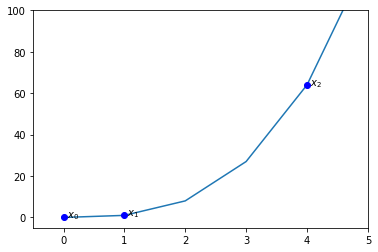

In [15]:
gambar()
plt.show()

Perlu diperhatikan, bentuk grafik yang ada yang berada di $[0,4]$ itu membentuk fungsi kuadrat (parabola) yang titik puncaknya berada di minimum.

Setelah menentukan 3 titik yang ada, kita akan mencari titik puncak dari persamaan kuadrat yang dibentuk oleh $x_0, x_1, x_2$ tersebut. Kita namakan titik itu $x_3$.

$x_3$ ini bisa dicari dengan rumus di atas, yaitu:

$$ \displaystyle
    x_3 =\frac{f(x_0) \cdot (x_1^2-x_2^2) + f(x_1) \cdot (x_2^2-x_0^2) + f(x_2) \cdot (x_0^2-x_1^2)}{2 \cdot f(x_0) \cdot (x_1-x_2) + 2 \cdot f(x_1) \cdot (x_2-x_0) + 2 \cdot f(x_2) \cdot (x_0-x_1)}.
$$

Sehingga, akan membentuk parabola yang melewati keempat titik itu.

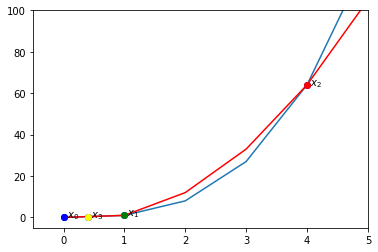

In [16]:
def xpuncak(x0,x1,x2):
    f0 = y(x0)
    f1 = y(x1)
    f2 = y(x2)
    x3 = f0*(x1**2-x2**2) + f1*(x2**2-x0**2) + f2*(x0**2-x1**2)
    return x3/(2*f0*(x1-x2) + 2*f1*(x2-x0) + 2*f2*(x0-x1))

def interpolation(x0,x1,x2,y0,y1,y2):
    denom = (x0-x1) * (x0-x2) * (x1-x2)
    if denom == 0:
        A, B, C = 0,0,0
        return A,B,C
    A     = (x2 * (y1-y0) + x1 * (y0-y2) + x0 * (y2-y1)) / denom
    B     = (x2**2 * (y0-y1) + x1**2 * (y2-y0) + x0**2 * (y1-y2)) / denom
    C     = (x1 * x2 * (x1-x2) * y0+x2 * x0 * (x2-x0) * y1+x0 * x1 * (x0-x1) * y2) / denom

    return A,B,C

    
def grafik(x0,x1,x2,x3):
    y0,y1,y2,y3 = y(x0), y(x1), y(x2), y(x3)
    
    a,b,c = interpolation(x0,x1,x2,y0,y1,y2)
    y_interpolation = lambda x: a*(x**2) + b*(x) + c
    
    plt.plot(x,y(x))
    plt.plot(x,y_interpolation(x), color='red')
    
    plt.plot([x0,x1,x2,x3],[y(x0),y(x1),y(x2),y(x3)], 'ro', color='blue')
    
    plt.plot([x0],[y(x0)],'ro', color = 'blue')
    plt.plot([x1],[y(x1)],'ro', color = 'green')
    plt.plot([x2],[y(x2)],'ro', color = 'red')
    plt.plot([x3],[y(x3)],'ro', color = 'yellow')

    plt.text(x0+0.05, y(x0), '$x_0$')
    plt.text(x1+0.05, y(x1), '$x_1$')
    plt.text(x2+0.05, y(x2), '$x_2$')
    plt.text(x3+0.05, y(x3), '$x_3$')
    
    plt.axis([-0.5,5,-5,100])
    
x3 = xpuncak(x0,x1,x2)
y0,y1,y2,y3 = y(x0), y(x1), y(x2), y(x3)
grafik(x0,x1,x2,x3)
plt.show()

Kemudian, karena tidak ter-*degenerate* parabolanya, kita bisa melakukan perbandingan dengan strategi yang mirip dengan **Golden-Section Search.**

*Untuk iterasi pertama, yang terjadi adalah $f(x_1) > f(x_3)$*

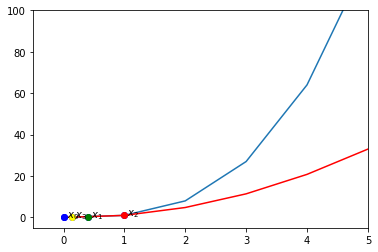

In [17]:
if y1 < y3:
    x0 = x1
    x1 = x3
elif y1 > y3:
    x2 = x1
    x1 = x3

x3 = xpuncak(x0,x1,x2)
y0,y1,y2,y3 = y(x0), y(x1), y(x2), y(x3)
grafik(x0,x1,x2,x3)
plt.show()

Dari perulangan yang ada, dapat kita lihat bahwa $x_3$ bergerak menuju titik optimum di dalam interval dari grafik yang diberikan. Dalam kasus ini, kita memperoleh $x_{Optimum} = 3$.

Untuk menyimpulkan, berikut algoritma Parabolic Interpolation secara lengkap (dengan contoh $f(x) = x^3$ dan titik awalnya adalah $x_0 = 0$, $x_1 = 1$, dan $x_2 = 4$ :

In [18]:
import numpy as np

f = lambda x: x**3                          #f(x) = x**3

def Parabolic(f, x0, x1, x2):
    while True:
        f0 = f(x0)
        f1 = f(x1)
        f2 = f(x2)
        
        x3 = f0*(x1**2-x2**2) + f1*(x2**2-x0**2) + f2*(x0**2-x1**2)
        x3 = x3/(2*f0*(x1-x2) + 2*f1*(x2-x0) + 2*f2*(x0-x1))
        
        sel = x3-x1
        sel = np.fabs(sel)
        if sel < 0.000001:
            break
            
        f3 = f(x3)
        
        if f3>f1:
            x0 = x1
            x1 = x3
        elif f3<f1:
            x2 = x1
            x1 = x3
    return x3

x0, x1, x2 = 0,1,4

x_sort = [x0,x1,x2]
x_sort.sort()
        
xop = Parabolic(f, x_sort[0],x_sort[1],x_sort[2])
fop = f(xop)

print("Titik optimum: %f\nNilai optimum: %f" % (xop, fop))

Titik optimum: 0.000000
Nilai optimum: 0.000000


## 3. Newton's Method

Metode ini mirip dengan metode Newton-Raphson untuk mencari akar. Namun, di dalam metode ini, ada sedikit perubahan.

Metode yang digunakan adalah:


$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}.$$

Seperti pada contoh sebelumnya, diketahui $f(x) = x^3$. Misalkan ditentukan $x_0 = 4$

Maka, langkah pertama yang harus dilakukan adalah kita mencari terlebih dahulu $f'(x)$ dan $f''(x)$

$f'(x) = 3\,x^2$ dan $f''(x) = 6\,x.$

Lalu, kita buat fungsi $f(x), f'(x), f''(x)$ . Dapat menggunakan metode Finite Difference untuk $f'(x)$ dan $f''(x)$, yaitu:

In [19]:
import numpy as np

y = lambda x: x**3

def df1(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

def df2(f, x, h):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

Agar lebih jelas mengenai fungsi yang ada, perhatikan gambar grafik dibawah ini:

*misal h=0.05*

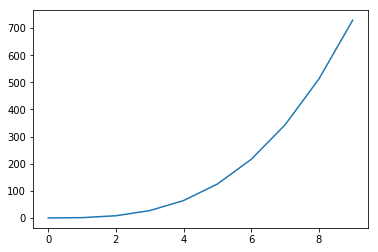

In [20]:
import matplotlib.pyplot as plt
h = 0.05
x = np.arange(0,10)
plt.plot(x,y(x))
plt.show()

Maka, kita dapat mem-visualisasikan cara kerja Metode Newton ini.

Pertama, kita pilih $f(x) = x^3$, $h = 0.05$, dan kita akan memulai pencarian dari $x=4$, maka kondisi awalnya adalah:

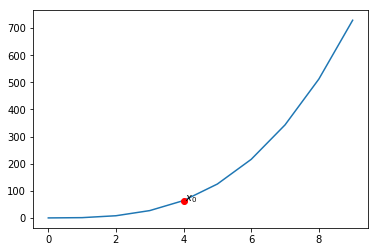

In [21]:
x0 = 4

x = np.arange(0,10)
plt.plot(x,y(x))
plt.plot([x0], [y(x0)], 'ro', color='red')
plt.text(x0+0.05, y(x0), '$x_0$')
plt.show()

Kemudian, yang akan terjadi adalah:

(*code di bawah dapat dijalankan beberapa kali untuk memperhatikan perubahan $x$-nya*)

$x_{bef}$ menunjukkan titik sebelum di-*update* menggunakan metode Newton.

$x_{aft}$ menunjukkan titik setelah di-*update* menggunakan metode Newton.

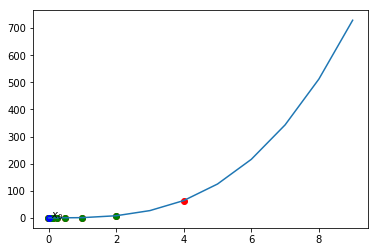

In [22]:
xb = np.array([])
xa = np.array([])

for i in range(10):
    x_bef = x0
    x_aft = x0 - (df1(y,x0,h)/df2(y,x0,h))
    xb = np.append(xb,x_bef)
    xa = np.append(xa,x_aft)
    x0 = x_aft

plt.plot(xb, y(xb), 'ro', color='red')
plt.plot(xa, y(xa), 'ro', color='green')
plt.plot(x0, y(x0), 'ro', color='blue')
plt.text(x0+0.05, y(x0), '$x_0$')
#plt.text(xb+0.05, y(xb), '$x_bef$')
#plt.text(xa+0.05, y(xa), '$x_aft$')

x = np.arange(0,10)
plt.plot(x,y(x))
plt.show()

Maka, dapat dilihat bahwa titik yang ada bergerak menuju titik optimumnya, dalam hal ini $x=0$

Kemudian, kita langsung masuk ke dalam metode Newton dengan iterasi sebanyak mungkin ($n$ kali).

Iterasi yang ada dapat berhenti jika sudah dilakukan sebanyak $n$ kali ataupun jika jarak titik yang baru dengan yang sekarang sudah sangat kecil (minimal $1 \cdot 10^{-6}$).

In [23]:
def newton(x, f, n):
    i = 0
    h = 0.05
    while True:
        if df2(f,x,h) == 0:
            x_next = x
            break            
        x_next = x - (df1(f,x,h)/df2(f,x,h))
        if i >= n or np.fabs(x-x_next) < 0.000001:
            break
        x = x_next
        i = i + 1
    return x_next

Dalam kasus ini, dipilih n = 25. Sehingga:

In [24]:
x = 4
n = 25

xop = newton(x,y,10)

print("Titik optimum: %f\nNilai optimum: %f" % (xop, y(xop)))

Titik optimum: -0.021616
Nilai optimum: -0.000010


Dibuat oleh:
- Budi Kosasih Halim - 1901486536
- William - 1901460373